## Student Name: 

---

# Tutorial 2: Basics of inference

All the parts that require action (either in the code or equations) are flagged by `<your turn>` or $\color{red}{<your~turn>}$

Quick note: if you see the warning `invalid value encountered`, it doesn't crash the cell/notebook. The results may still be valid.

In [1]:
import numpy as np
import emcee
from scipy.integrate import quad
import scipy.stats as st
from scipy.misc import derivative
from scipy.optimize import curve_fit, minimize, fsolve
import matplotlib.pylab as plt
import matplotlib.colors as colors

plt.rc('font', family='serif')

# Below is a set of colors for matplotlib that is colorblind-friendly
# To use them in plotting commands, you can simply set "color=colorset[N]",
# where N is an integer in [0,16), reflecting the index of the colors below.
colorset = ['#000000','#00270C','#00443C','#005083',
            '#034BCA','#483CFC','#9C2BFF','#EB24F4',
            '#FF2DC2','#FF4986','#FF7356','#FFA443',
            '#EBD155','#D3F187','#D7FFC8','#FFFFFF']

## Problem 1. Estimating source flux based on observations

We observe a star with a telescope/detector over a series of $N$ measurements, where the $i^{\rm{th}}$ measurement yields a flux of $F_i$ and a (gaussian) flux uncertainty of $e_i$. Given this set of measurements, and assuming that the source flux is constant over time, what is our best estimate of the true flux $F_\rm{true}$?

### data

In [2]:
F = np.loadtxt('Data_T2_F.txt')
e = np.loadtxt('Data_T2_dF.txt')

### EDA

- Check number of measurements
- Make a [forrest plot](https://en.wikipedia.org/wiki/Forest_plot) for the measurements and uncertainties (Flux measurements on the x-axis). To do this, you can simply use `plt.errorbar()` in matplotlib.

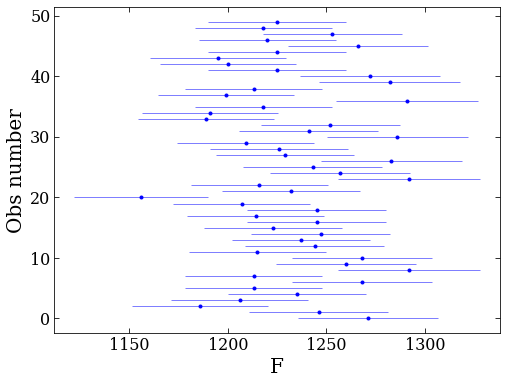

In [3]:
# <your turn>

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
# <your turn>

ax.errorbar(x=F,xerr=e,y=range(len(F)),fmt='.b',elinewidth=0.5)

# Plot cosmetics
ax.set_xlabel('F',fontsize=20)
ax.set_ylabel('Obs number', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)

### Model and parametrization:
The assumptions are straight-forward and the model is trivial: source is not variable, and the connection between what we measure and what we aim to estimate is clear:

$$ F_\rm{true} \sim  D $$

Where $D = \{D_1,\cdots,D_i\,\cdots,D_N\}$ is the entire set of measurements, in which each single measurement is $D_i = (F_i,e_i)$.

### Approach A: Frequentist

Let's use maximum likelihood. We construct the likelihood function:
$$\mathcal{L}(D|F_{\rm{true}}) = \prod_{i=1}^N P(D_i|F_{\rm{true}}) $$

Where:
$$ P(D_i|F_{\rm{true}}) = ~\color{red}{<your~turn>} ~= \frac{1}{\sigma_i \sqrt{2\pi}} \exp\left[\frac{-(D_i -F_i)^2}{2\sigma_i^2}\right], \quad F_i = F_{\rm{true}}$$

$$\Rightarrow \mathcal{L}(D|F_{\rm{true}}) = \prod_{i=1}^N \frac{1}{\sigma_i \sqrt{2\pi}} \exp\left[\frac{-(D_i -F_{\rm{true}})^2}{2\sigma_i^2}\right] $$

It is often more convenient to instead compute the log-likelihood. So combining the previous two equations and retaining only the terms that depend on both data and model:

$$ \ln\mathcal{L} = ~\color{red}{<your~turn>}~=-\frac{1}{2}\sum_{i=1}^{N}\left[\frac{(D_i -F_{\rm{True}})^2}{2\sigma_i^2}\right] \color{purple}{-\frac{1}{2}\sum_{i=1}^N \ln (2\pi \sigma_i^2)}$$


Our goal is to maximize the likelihood function above. In this particular case, we can even do it analytically. However, we will stick to numerical approach here to get familiar with the method.

#### Based on the discussion above, write a python function for the (log-)likelihood function and find the best-fit values for parameters.

In [4]:
# <your turn>: Based on the equations above, define the likelihood function we'd want to maximize
# Then use basic optimization methods to find the "best-fit" values for parameters.
# <your turn> - hint: you can use scipy.minimize and the negative log-likelihood function!

def loglikelihood(F_true, F, e):
    # <your turn>
    """
    F_true is what we want to estimate (e.i., want to know the likelihood as a function of this value).
    
    F and e are the measurements and their uncertainties, respectively.
    
    This function should return the likelihood estimate for any F_true.
    """
    llike = -0.5*np.sum(((F-F_true)/e)**2)
    return llike

def negloglikelihood(F_true, F, e):
    return -1 * loglikelihood(F_true, F, e)

f_results_minimize = minimize(negloglikelihood,1000,args=(F,e))

results_frequentist = f_results_minimize.x[0]
print(f_results_minimize)
print(f'\nFrequentist best-fit value: {results_frequentist}')

      fun: 19.45529383347639
 hess_inv: array([[24.68002332]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 3
     njev: 7
   status: 0
  success: True
        x: array([1234.00178567])

Frequentist best-fit value: 1234.001785674623


#### Plot the log-likelihood function (or negative of it) and indicate the best-fit value found in the cell above on top of it (e.g., using `axvline` in `matplotlib`).

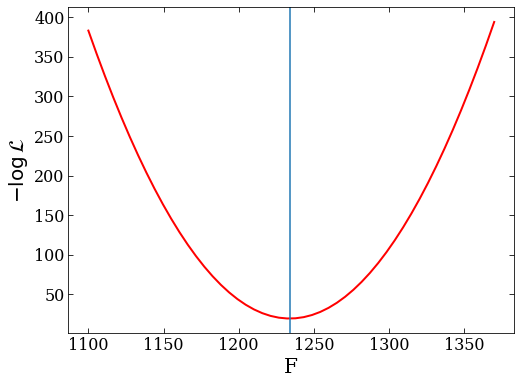

In [5]:
# <your turn> : define variables and calculations you may need here.
test_x = np.linspace(1100,1370)
test_y = [negloglikelihood(x, F, e) for x in test_x]

test_y = np.empty(len(test_x))
for i,x_i in enumerate(test_x):
    test_y[i] = negloglikelihood(x_i, F, e)
    

# Initiating the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
# <your turn> : add your plotting commands here.

ax.plot(test_x,test_y,'-r',lw=2)
ax.axvline(results_frequentist)

# Plot cosmetics - feel free to edit.
ax.set_xlabel('F',fontsize=20)
ax.set_ylabel('$-\log\mathcal{L}$',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)

### Approach B: Bayesian

What we want to compute is our knowledge of the parameters in question ($F$ in this case):

$$ P(F_{\rm{true}} | D) = \frac{P(F_{\rm{true}})~P(D|F_{\rm{true}})}{P(D)}$$

In practice, $P(D)$ amounts to normalization, thus leaving us with the posterior:

$$ P(F_{\rm{true}} | D) \propto P(F_{\rm{true}})~P(D|F_{\rm{true}})$$

Where $P(D|F_{\rm{true}}) = \mathcal{L}(D|F_{\rm{true}})$ is the likelihood that we calculated in approach A.

It is generally easier to do this in the log-space:
$$ \log P(F_{\rm{true}} | D) \propto \log P(F_{\rm{true}}) + \log P(D|F_{\rm{true}})$$


So with all that, let's define functions for the log-prior and log-posterior (assuming the same definition and assignment for the likelihood as approach A):

In [6]:
# <your turn>: define functions for the log-prior and log-posterior.
# Note: log-likelihood is the same as in the frequentist approach, so we don't need to redefine it.

def log_prior(F_true):
    # Assume flat prior between 1150 and 1300
    lolim = 1150
    uplim = 1300

    ## Approach A: manual definition
    if (F_true > lolim) & (F_true < uplim):
        logprior = np.log(1.0/(uplim-lolim))
    else:
        logprior = -1e20   # a numerical value representing -inf
    
    ## Approach B: using existing functions
    #logprior = st.uniform(lolim,uplim-lolim).logpdf(F_true)

    
    return logprior


def log_posterior(F_true, F, e):
    return log_prior(F_true) + loglikelihood(F_true, F, e)

# If your prior is well-defined and normalized, the following should return ~1.0.
print(f'Testing your log-prior, its integral from 1000 to 2000 is roughly:\
      {quad(lambda x: np.exp(log_prior(x)), 1000,2000)[0]}')

Testing your log-prior, its integral from 1000 to 2000 is roughly:      1.0000000000000002


**NOTE: note that we built everything in $\log$ space, not linear.**

#### Now, similar to the frequentist approach, find the best-fit value for $F_\textrm{true}$

In [7]:
# <your turn>
def neg_log_posterior(F_true, F, e):
    return -1 * log_posterior(F_true, F, e)

b_results_minimize = minimize(neg_log_posterior,1200,args=(F,e))
results_bayesian = b_results_minimize.x[0]
print(b_results_minimize)
print(f'\nBayesian best-fit value: {results_bayesian}')

      fun: 24.46592912757486
 hess_inv: array([[24.68003767]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([1234.00179901])

Bayesian best-fit value: 1234.0017990072695


In the bayesian approach, we are, simply put, "updating" information from prior to posterior based on new data. So, it is important to compare prior to posterior distribution to see the impact of our new data.

#### Plot the prior and posterior distribution together and compare.

*Note: As you will see, the scale of posterior and prior functions are significantly different (why?). Thus, we will use a simple matplotlib trick to over plot them with different y-axis while sharing the X-axis*.

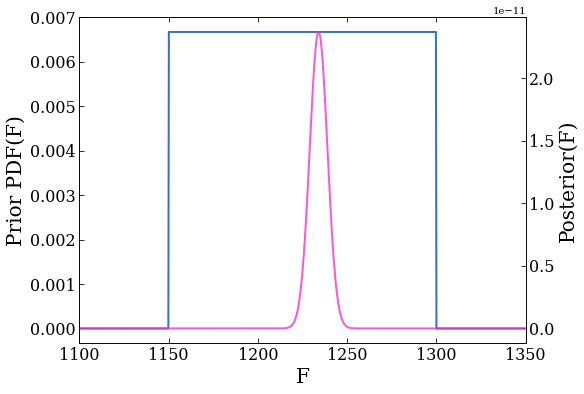

In [8]:
# <your turn> : define variables and calculations you may need here.
test_x = np.linspace(1100,1400,1000)
test_y_post = [np.exp(log_posterior(i, F, e)) for i in test_x]
test_y_pri = [np.exp(log_prior(i)) for i in test_x]

# Initiating the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
# <your turn> : add your plotting commands for the *prior* here.


ax.plot(test_x,test_y_pri,lw=2, alpha=0.8,label=r'Prior', color=colorset[4])

# Plot cosmetics - feel free to edit.
ax.set_xlabel('F',fontsize=20)
ax.set_ylabel('Prior PDF(F)',fontsize=20)
ax.set(xlim=[1100,1350])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)
# This is where we add a new "axis" on the same plot.
ax2 = ax.twinx()
# <your turn> : add your plotting commands for the *posterior* here.

ax2.plot(test_x,test_y_post,lw=2, alpha=0.8,label=r'Posterior', color=colorset[8])


# Plot cosmetics - feel free to edit.
ax2.set_xlabel('F',fontsize=20)
ax2.set_ylabel('Posterior(F)',fontsize=20)
ax2.set(xlim=[1100,1350])
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', length=5)
ax2.tick_params(axis='both', which='minor', length=2.5)
ax2.tick_params(axis='both', which='both',direction='in',right=True,top=True);

#### Why is the posterior function values so small? Can it actually be considered a PDF?

We ignored the model evidence term which while not impacting the best-fit value, it normalizes the posterior function, turning it into a PDF where $\int P(F|D) dF = 1$.

In the simplest cases like this (simple likelihoods, low-dimension parameter space), calculating posterior directly/analytically is very simple and straight forward. This can quickly change and get complicated (especially for the "*evidence*"). Hence, this underlines the importance of MCMC methods: they can fairly sample from a **ill-normalized** posterior.

So, in principle, an MCMC is not appropriate for our case here (as with a little bit of math, we can calculate the model evidence term and normalize the posterior nicely), but as we are trying to get familiar with techniques for more complex scenarios, we assume that the normization is difficult to estimate and use a simple MCMC sampling implementation.

So, **the output of MCMC instead of being a functional form of the posterior PDF, will be a sample that (assuming a successful MCMC run) is a fair sample from the posterior PDF**.

In [9]:
np.random.seed(1)    # To track the randomness

# MCMC setup and execution:
ndim = 1       # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 1000   # "burn-in" period to let chains stabilize
nsteps = 4000  # number of MCMC steps to take (after burn-in)

# we'll start at random locations between 0 and 3000
starting_guesses = 3000 * np.random.rand(nwalkers, ndim)

# Now we start the sampler using the log_posterior:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[F, e])
sampler.run_mcmc(starting_guesses, nsteps)

#Extracting the posterior sample result
#posterior_sample = sampler.chain                               # shape = (nwalkers, nsteps, ndim)
posterior_sample = sampler.chain[:, nburn:, :].ravel()         # discard burn-in points

# <your turn>: The process above grabs your log_posterior and samples from it in a fair way. 
# Now the variable "posterior_sample" contains the result of this MCMC process. 
# Based on this, Perform a Bayesian point-estimation and report a "best-fit" value.


bayesian_point_estimate = np.median(posterior_sample)
print('F posterior median:',bayesian_point_estimate)

F posterior median: 1234.0315853346508


#### Exploring the walkers and their convergence

The walkers' steps (i.e., the posterior sample) is stored in `sampler.chain` above, which is an array with dimensions $N_{walkers} \times N_{steps} \times N_{parameters}$ . When we make `posterior_sample`, we basically remove the first 1000 steps as the *burn-in*, and then *flatten* the array (i.e., make a 1-D array concatenating all the walkers into the same array to make a single sample for each parameter).

But let's explore how our walkers have walked. Choose a few walkers (say, 5 or 10) from `sampler.chain` (not all 50) and plot the first 200 steps for each of them:

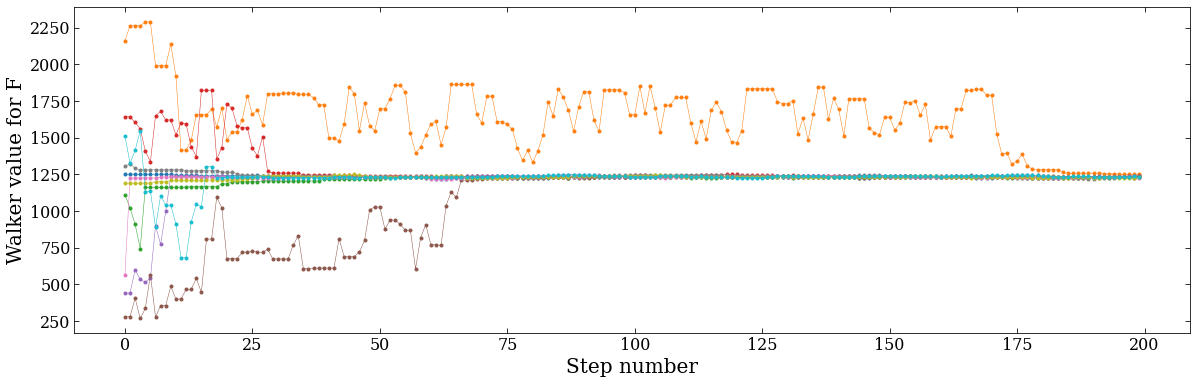

In [10]:
# <your turn> : 

# Initiating the figure
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1,1,1)
# <your turn> : add your plotting commands here. If you label them properly, they will show up in the legend.
for chain_no in range(10):
    ax.plot(sampler.chain[chain_no][:200],'.-',lw=0.5)

# Plot cosmetics - feel free to edit.
ax.set_xlabel('Step number',fontsize=20)
ax.set_ylabel('Walker value for F',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)


Now let's repeat the same last step but plot the last 3000 steps:

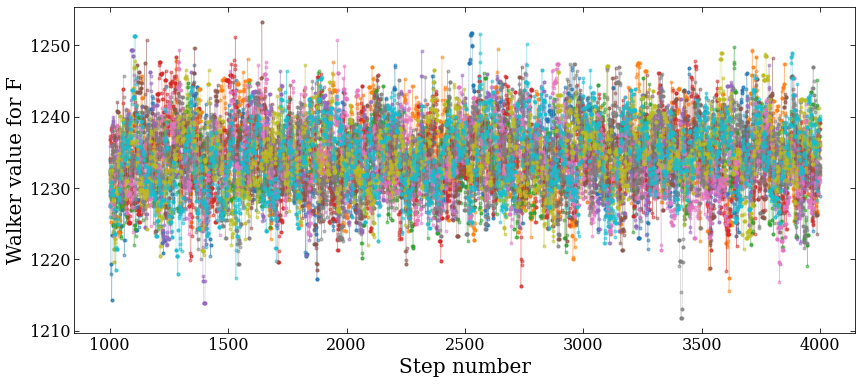

In [11]:
# <your turn> : 

# Initiating the figure
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)
# <your turn> : add your plotting commands here. If you label them properly, they will show up in the legend.
for chain_no in range(10):
    ax.plot(range(1000,4000),sampler.chain[chain_no][1000:],'.-',lw=0.5,alpha=0.5)

# Plot cosmetics - feel free to edit.
ax.set_xlabel('Step number',fontsize=20)
ax.set_ylabel('Walker value for F',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)

#### Now, plot the posterior sample against the prior PDF.
*Hint: You can use the keyword `density = True` in a matplotlib histogram to make it normalized, so that it sums to 1.0*

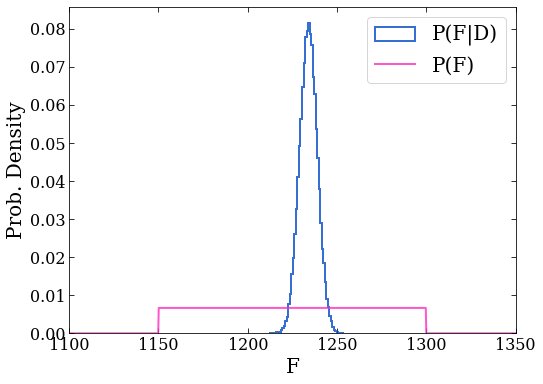

In [12]:
# <your turn> : define variables and calculations you may need here.
test_x = np.linspace(1100,1400,1000)
test_y = [np.exp(log_prior(i)) for i in test_x]


# Initiating the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
# <your turn> : add your plotting commands here. If you label them properly, they will show up in the legend.

ax.hist(posterior_sample, bins=50, histtype='step', lw=2, alpha=0.8, density=True, label=r'P(F|D)',color=colorset[4])
ax.plot(test_x,test_y,lw=2, alpha=0.8,label=r'P(F)', color=colorset[8])

# Plot cosmetics - feel free to edit.
ax.legend(fontsize=20)
ax.set_xlabel('F',fontsize=20)
ax.set_ylabel('Prob. Density',fontsize=20)
ax.set(xlim=[1100,1350])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)

### Looking at the impact of prior on the results

With a uniform prior in this problem, the results from both frequentist and bayesian methods are very well consistent with each other. But a more restrictive/constrained prior can lead to a different result. 

We are going to briefly explore that in this problem:

#### Redefine the prior, this time so that the propbability of getting a value $F<1240$ is $\approx 0$. Perform a bayesian point estimation on the result and plot the results, similar to the last few steps.

F posterior median: 1241.85348386669


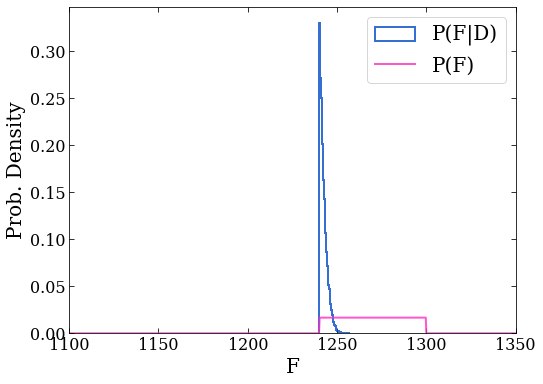

In [13]:
##### <your turn>
def informed_log_prior1(F_true):
    lolim = 1240
    uplim = 1300
    if (F_true > lolim) & (F_true < uplim):
        logprior = np.log(1.0/(uplim-lolim))
    else:
        logprior = -1e10      # a numerical value representing -inf
    return logprior

# Same posterior as before, with the prior replaced
def informed_log_posterior1(F_true, F, e):
    return informed_log_prior1(F_true) + loglikelihood(F_true, F, e)

# MCMC setup and execution:
ndim = 1       # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 1000   # "burn-in" period to let chains stabilize
nsteps = 4000  # number of MCMC steps to take (after burn-in)

# we'll start at random locations between 0 and 3000
starting_guesses = 3000 * np.random.rand(nwalkers, ndim)

# Now we start the sampler using the log_posterior:
sampler = emcee.EnsembleSampler(nwalkers, ndim, informed_log_posterior1, args=[F, e])
sampler.run_mcmc(starting_guesses, nsteps)

#Extracting the posterior sample result
#posterior_sample = sampler.chain                               # shape = (nwalkers, nsteps, ndim)
informed_posterior_sample1 = sampler.chain[:, nburn:, :].ravel()         # discard burn-in points

# <your turn>: Bayesian point estimation
print('F posterior median:',np.median(informed_posterior_sample1))

# <your turn>: Plotting prior and posterior

# <your turn> : define variables and calculations you may need here.
test_x = np.linspace(1100,1400,1000)
test_y = [np.exp(informed_log_prior1(i)) for i in test_x]

# Initiating the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
# <your turn> : add your plotting commands here. If you label them properly, they will show up in the legend.

ax.hist(informed_posterior_sample1, bins=50, histtype='step', lw=2, alpha=0.8, density=True, label=r'P(F|D)',color=colorset[4])
ax.plot(test_x,test_y,lw=2, alpha=0.8,label=r'P(F)', color=colorset[8])

# Plot cosmetics - feel free to edit.
ax.legend(fontsize=20)
ax.set_xlabel('F',fontsize=20)
ax.set_ylabel('Prob. Density',fontsize=20)
ax.set(xlim=[1100,1350])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)

#### Repeat the last step, but replace the prior with a gaussian prior.
*Note: Remember, it is better if the prior is normalized (for plotting).*

/home/arash/anaconda3/envs/bayes/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


F posterior median: 1238.6562274670432


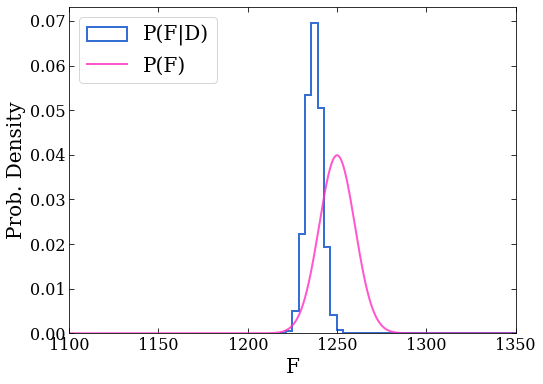

In [14]:
##### <your turn>
def informed_log_prior2(F_true):
    mu = 1250
    sd = 10
    like = 1./(np.sqrt(2.*np.pi)*sd)*np.exp(-np.power((F_true - mu)/sd, 2.)/2)
    if like > 0:
        logprior = np.log(like)
    else:
        logprior = -np.inf
    return logprior

# Same posterior as before, with the prior replaced
def informed_log_posterior2(F_true, F, e):
    return informed_log_prior2(F_true) + loglikelihood(F_true, F, e)

# MCMC setup and execution:
ndim = 1       # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 1000   # "burn-in" period to let chains stabilize
nsteps = 4000  # number of MCMC steps to take (after burn-in)

# we'll start at random locations between 0 and 3000
starting_guesses = 3000 * np.random.rand(nwalkers, ndim)

# Now we start the sampler using the log_posterior:
sampler = emcee.EnsembleSampler(nwalkers, ndim, informed_log_posterior2, args=[F, e])
sampler.run_mcmc(starting_guesses, nsteps)

#Extracting the posterior sample result
#posterior_sample = sampler.chain                               # shape = (nwalkers, nsteps, ndim)
informed_posterior_sample2 = sampler.chain[:, nburn:, :].ravel()         # discard burn-in points

# <your turn>: Bayesian point estimation
print('F posterior median:',np.median(informed_posterior_sample2))

# <your turn>: Plotting prior and posterior

# <your turn> : define variables and calculations you may need here.
test_x = np.linspace(1100,1400,1000)
test_y = [np.exp(informed_log_prior2(i)) for i in test_x]

# Initiating the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
# <your turn> : add your plotting commands here. If you label them properly, they will show up in the legend.

ax.hist(informed_posterior_sample2, bins=500, histtype='step', lw=2, alpha=0.8, density=True, label=r'P(F|D)',color=colorset[4])
ax.plot(test_x,test_y,lw=2, alpha=0.8,label=r'P(F)', color=colorset[8])

# Plot cosmetics - feel free to edit.
ax.legend(fontsize=20)
ax.set_xlabel('F',fontsize=20)
ax.set_ylabel('Prob. Density',fontsize=20)
ax.set(xlim=[1100,1350])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)

## Interval estimation

### Fisher information

Estimate the uncertainty on each parameter using the Fisher information.

*Hint: You can use the python function `derivative` under `scipy.misc` (which is already imported in this notebook).*

In [ ]:
# <your turn>


fisher_delta_f = 

print(f'F_true: {results_frequentist} +/- {fisher_delta_f}')

## Delta statistics

Define a statistic (e.g., $\chi^2$ statsitc), plot the statistic as a function of the parameter model you're fitting and indicate the 1-$\sigma$ threshold on the plot (using `axhline()` in matplotlib). Then estimate the 1-$\sigma$ uncertainties using the $\Delta$ method.

First let's define the statistic function and plot it:

In [ ]:
# <your turn>: Define a chi-squared function
def chi2(F_true, F, e):
    return 

# <your turn> : define variables and calculations you may need here.
# Hint: Plot the F_true values between 1225 and 1243

# Initiating the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
# <your turn> : add your plotting commands here. If you label them properly, they will show up in the legend.

# Plot cosmetics - feel free to edit.
ax.set_xlabel('F',fontsize=20)
ax.set_ylabel(r'$\chi^2$',fontsize=20)
ax.set(xlim=[1225,1243])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)

#### Now, estimate the value of $F$ at 1-$\sigma$.

*Hint: You can define a function based on $\chi^2$ that evaluates to 0 at the 1-$\sigma$ points, then use implemented methods (like `fsolve` in `scipy.optimize`) to find its roots.*

In [ ]:
# <your turn> : Just define the function that would evaluate to zero at the 1-sigma points

def delta_1sig(F_true, F, e):
    return 


# If your function is correct, these should return meaningful results
deltastats_lower_bound = fsolve(delta_1sig,results_frequentist-1,args=(F,e))[0]
deltastats_upper_bound = fsolve(delta_1sig,results_frequentist+1,args=(F,e))[0]
print(f'Uncertainty bounds - lower: {deltastats_lower_bound}, upper:{deltastats_upper_bound}')

deltastats_lower_uncert = results_frequentist - deltastats_lower_bound 
deltastats_upper_uncert = deltastats_upper_bound - results_frequentist

print(f'F_true: {results_frequentist} (-{deltastats_lower_uncert}/+{deltastats_upper_uncert})')

The interval between these uncertainties is refered to as the 1-$\sigma$ (68%) **confidence interval** in frequentist inference.

**Note: Remember that `fsolve` returns the points where the function hits 1-$\sigma$ here, the returned values are not the actual uncertainty! but the best fit value $\pm$ the 1-$\sigma$ uncertainty.**

## Bootstrap (Monte-Carlo)

Let's first make sure we can simulate a mock data set which shares the properties of our data set. For this purpose, our aim **in this specific example** is consider the uncertainty in parameters, mainly due to the uncertainties in the data. Given through out this example we **assume data uncertainties are gaussian**, we simply resample each data point $i$, assuming $\mathcal{N}(y_i,\delta y_i)$.

**Remember that boostrap method depends entirely on assumptions in the simulation!**

So, with that in mind, create a single mock data set based on our data and plot it.

In [ ]:
# <your turn>: construct a single bootstrap simulation 
# Remember: You are not simulating "e" values, just "F" values
# So the variable below should be a simulation of the "F" data array
bootstrap_data = 

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
# <your turn>: add plotting commands here
# Note: your bootsrap simulation will have the same errorbar/uncertainty as the data


# Plot cosmetics
ax.legend(fontsize=18)
ax.set_xlabel('F',fontsize=20)
ax.set_ylabel('Obs number', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)

Now we will do this iteratively to generate a large enough sample that would represent the propagation of uncertainties in the data:

In [ ]:
# <your turn>: Simply fill the definition for "bootstrap_data" below based on your definition above
n_bootstrap = 10000
Ftrue_bootstrap = []

for i in range(n_bootstrap):
    bootstrap_data =   # Add the definition HERE!
    iteration_best_fit = minimize(negloglikelihood,1000,args=(bootstrap_data,e)).x[0]
    Ftrue_bootstrap.append(iteration_best_fit)

# Initiating the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.hist(Ftrue_bootstrap, bins=20, edgecolor='w',lw=2, alpha=0.8, color=colorset[4])

# Plot cosmetics
ax.set_xlabel('F',fontsize=20)
ax.set_ylabel('#simulations',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)

#### Now, use sample quantiles to estimate the uncertainties from the bootstrap sample.

In [ ]:
# <your turn>: 
MC_lower_bound = 
MC_upper_bound = 
print(f'Uncertainty bounds - lower: {MC_lower_bound}, upper:{MC_upper_bound}')

MC_lower_uncert = results_frequentist - MC_lower_bound 
MC_upper_uncert = MC_upper_bound - results_frequentist

print(f'F_true: {results_frequentist} (-{MC_lower_uncert}/+{MC_upper_uncert})')

## Bayesian point-estimation based on MCMC

Well, you already have the posterior sample (`posterior_sample`)! So, it would simply be a quantile estimation like for the bootstrapped sample!

In [ ]:
# <your turn>: 
MCMC_lower_bound = 
MCMC_upper_bound = 

print(f'Uncertainty bounds - lower: {MCMC_lower_bound}, upper:{MCMC_upper_bound}')

MCMC_lower_uncert = results_bayesian - MCMC_lower_bound 
MCMC_upper_uncert = MCMC_upper_bound - results_bayesian

print(f'F_true: {results_frequentist} (-{MCMC_lower_uncert}/+{MCMC_upper_uncert})')

The interval between these uncertainties is refered to as the 1-$\sigma$ (68%) **credible interval** in bayesian inference.

## Difference between the meaning of confidence and credible intervals:

While the values are pretty similar in our case here, their philosophical meanings is vastly different. Quoting Jake vanderPlas:

"There is a 68% probability that when we compute $F$ from data of this sort, the true mean will fall within the **confidence interval**." - Frequentists

"Given our observed data, there is a 68% probability that the true value of $F$ falls within the **credible interval**" - Bayesians

## You can now save the notebook and download it.